# توابع هزینه
## loss function

با کال بک کردن یک فانکشن بخصوص بهترین مدل رو تشخیص بدیم و ذخیره کنیم

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.arange(-60,60,0.5)
y=x**2+5*x+3

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((192,), (48,))

In [4]:
model_2=keras.Sequential()
model_2.add(keras.layers.Dense(units=256,activation='relu',input_shape=[1]))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=256,activation='relu'))
model_2.add(keras.layers.Dense(units=1))

d:\code\venvdatascience\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


learning_rate
نشان دهنده سرعت الگوریتم optimization

هرچه بیشتر باشه سرعت الگوریتم بیشتر میشه ولی ممکنه جواب درستی نتونیم بگیریم اما هرچه کمتر بشه سرعتش پایین تره و جواب بهینه تر میشه

In [8]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss= keras.losses.MeanSquaredError() 
metric=tf.keras.metrics.RootMeanSquaredError()
model_2.compile(optimizer=optimizer,loss=loss,metrics=[metric])


مزایای callback  گرفتن 

وقتی که مدل رو داریم ترین میکنیم اول میره یه فانکشن رو روی ایپاک اجرا میکنه بعد میره سراغ بعدی

مزایای کال بک

1- کاری کنیم که مدل بهتر و دقیق تر ذخیره بشه

2- اگر که لاست فانکشن ما از یه حدی بیشتر تغییر نکرد الکی محاسبه نکنه 



*val_lost => validation lost

بخوایم روی داده تست بهترین جواب رو داشته باشه

lost

بخوایم روی داده ترین بهترین جواب رو داشته باشه

min_delta

اختلاف بین دوتا loss دلتا رو تشکیل میده

کمترین اختلافی که اگر از اون کمتر شد دیگر قابل قبول نباشه

***patience

چقدر صبر کنه

اگر که ببینه لاست مقدار ثابتیه و تغییر نمی کنه تا چند تا ادامه بده ایپاک هارو

*restore_best_weights

اگر تا آخر بره و جواب بهتر نشد اونی رو در نظر بگیره که از همه بهتره



restore_best_weights
وقتی ست بشه بهترین مدل رو ذخیره میکنه و اگر که داده های بعدی کمتر نشه ادامه نمی ده

اگر تعداد patience رو درست انتخاب نکنیم همان اول کار متوقف میشه و ادامه نمی ده

کل قضیه

از روی مقدار val_loss در نظر میگیره اگر به تعداد patience تغییر نداشته باشه متوقف میکنه عملیات ترین رو و میگه به جواب درست رسیدم
و چون restore_best_weightsرو ست کردیم بهترین جواب رو ذخیره میکنه 

In [12]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)

In [14]:
hist =model_2.fit(x_train,y_train,epochs=1000,batch_size=128,callbacks=[early_stop],validation_data=(x_test,y_test))

Epoch 1/1000


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 3633.7502 - root_mean_squared_error: 60.2561 - val_loss: 6995.7500 - val_root_mean_squared_error: 83.6406
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4993.1382 - root_mean_squared_error: 70.6260 - val_loss: 13692.7539 - val_root_mean_squared_error: 117.0160
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8079.8745 - root_mean_squared_error: 89.8874 - val_loss: 12637.1689 - val_root_mean_squared_error: 112.4152
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9014.7754 - root_mean_squared_error: 94.9218 - val_loss: 9065.4961 - val_root_mean_squared_error: 95.2129
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4907.9497 - root_mean_squared_error: 70.0424 - val_loss: 6167.2749 - val_root_mean_squared_error: 78.5320
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3001.8811 - root_mean_squared_error: 54.7757 - val_loss: 6783.5977 - val_root_mean_squared_error: 82.3626
Epoch 7/1000
2/2 ━━

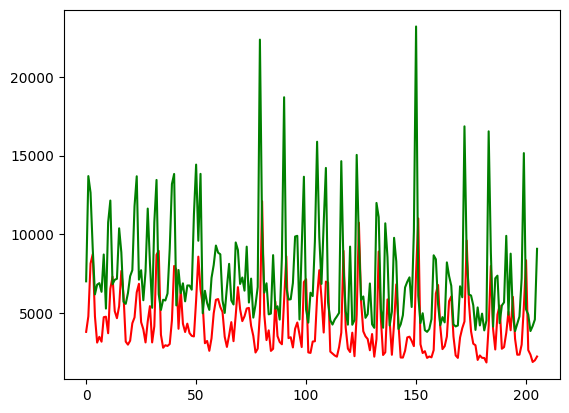

In [16]:
plt.plot(hist.history['loss'],color='red')
plt.plot(hist.history['val_loss'],color='green')
plt.show()

طبق موازنه بایاس و وارینس هرچی داده ترین و تست به هم نزدیک بشن مدل ما بهتر کار میکنه اگر از هم دور بشن جاییه که باید نگه داریم مدل رو